### CAPSTONE PROJECT:Predicting Stock Prices Using Machine Learning Models

## 1.Data collection and cleaning

###  Import Libraries

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

###  Dataset Loading

In [4]:
ticker = "AAPL"

# Define the start and end date
start_date = "2015-01-01"
end_date = "2024-11-01"

# Download the data
df_Apple= yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of data
df_Apple.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.347172,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.661272,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.663500,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,23.995314,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.917269,237458000


### Dataset Rows and Columns Count

In [5]:
df_Apple.shape

(2475, 6)

### Dataset Information

In [6]:
df_Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2475 entries, 2015-01-02 to 2024-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2475 non-null   float64
 1   High       2475 non-null   float64
 2   Low        2475 non-null   float64
 3   Close      2475 non-null   float64
 4   Adj Close  2475 non-null   float64
 5   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.4 KB


### Duplicate Values

In [7]:
df_Apple.duplicated().sum()

0

In [8]:
missing_data=df_Apple.isnull().sum()
missing_data

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

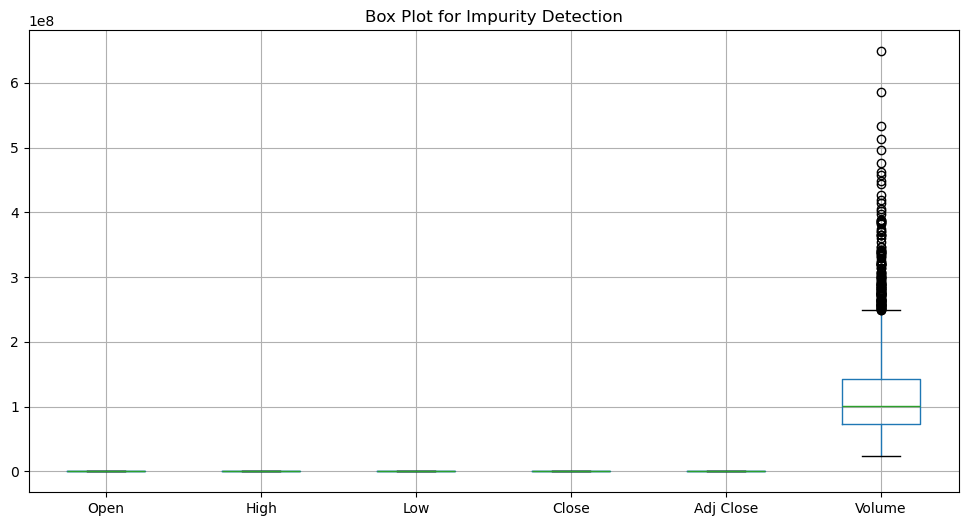

In [9]:
df_Apple.ffill(inplace=True) # Fill missing data using forward fill method

plt.figure(figsize=(12, 6)) # Box plot for impurity detection
df_Apple.boxplot()
plt.title("Box Plot for Impurity Detection")
plt.show()

###  Statistical Comparison Between Raw and Clean Data
Provide a statistical comparison between the raw and clean data and visualize them.

Raw Data Statistics:
               Open         High          Low        Close    Adj Close  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean     93.931360    94.932341    92.985114    94.003943    91.889440   
std      63.075040    63.730782    62.450247    63.123545    63.551886   
min      22.500000    22.917500    22.367500    22.584999    20.697262   
25%      37.190001    37.556250    36.767500    37.252499    34.978189   
50%      64.315002    65.110001    63.845001    64.857498    62.878208   
75%     150.180000   151.785004   148.674995   150.674995   148.617577   
max     236.479996   237.490005   234.449997   236.479996   236.220108   

             Volume  
count  2.475000e+03  
mean   1.182710e+08  
std    6.828974e+07  
min    2.404830e+07  
25%    7.302435e+07  
50%    1.014504e+08  
75%    1.433006e+08  
max    6.488252e+08  
Clean Data Statistics:
               Open         High          Low        Close    Adj Close  \
count  2475.000

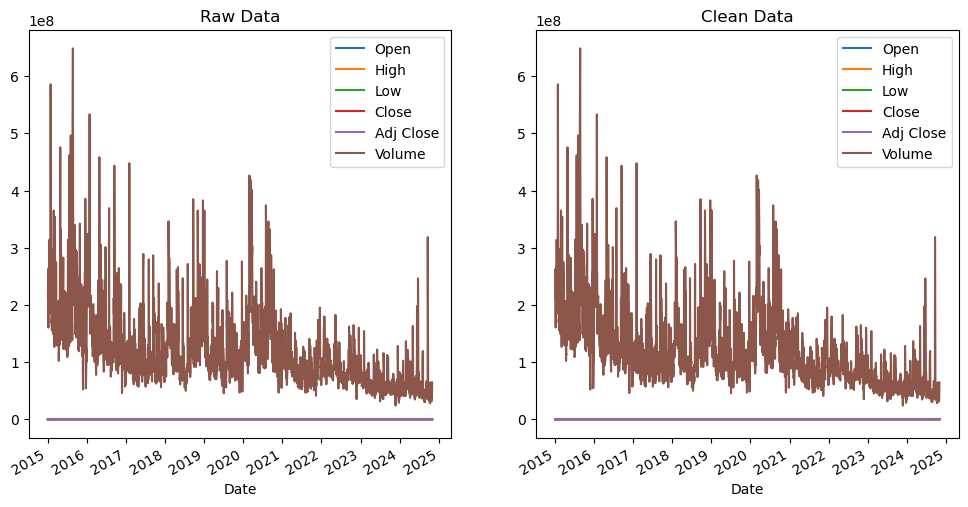

In [10]:
# Statistical comparison
raw_data_stats = df_Apple.describe()
clean_data_stats = df_Apple.ffill().describe()

print("Raw Data Statistics:\n", raw_data_stats)
print("Clean Data Statistics:\n", clean_data_stats)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_Apple.plot(title="Raw Data", ax=plt.gca())
plt.subplot(1, 2, 2)
df_Apple.ffill().plot(title="Clean Data", ax=plt.gca())
plt.show()

In [11]:
for items in df_Apple.columns.tolist():
    print("The number of unique values in column",items,"is",df_Apple[items].nunique())

The number of unique values in column Open is 2339
The number of unique values in column High is 2341
The number of unique values in column Low is 2361
The number of unique values in column Close is 2344
The number of unique values in column Adj Close is 2442
The number of unique values in column Volume is 2468


## 2.Exploratory Data Analysis (EDA)

<Axes: xlabel='Date'>

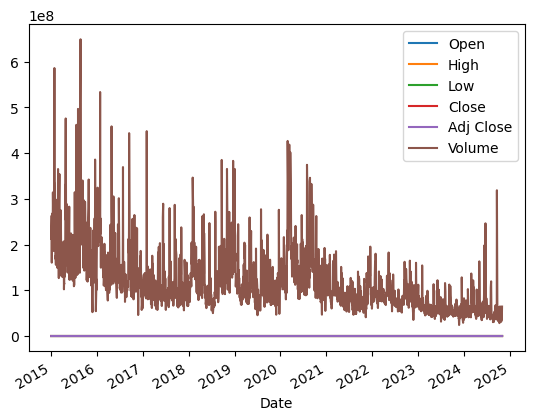

In [12]:
df_Apple.plot()

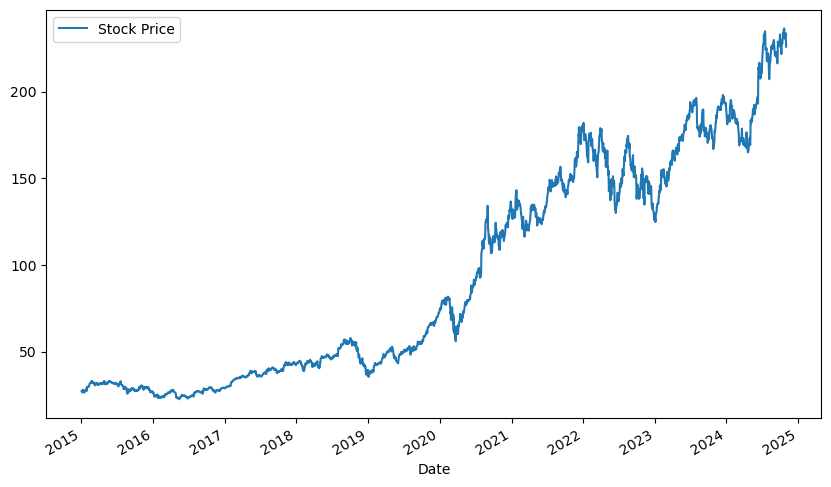

In [13]:
df_Apple['Close'].plot(label='Stock Price', figsize=(10, 6))
plt.legend()
plt.show()

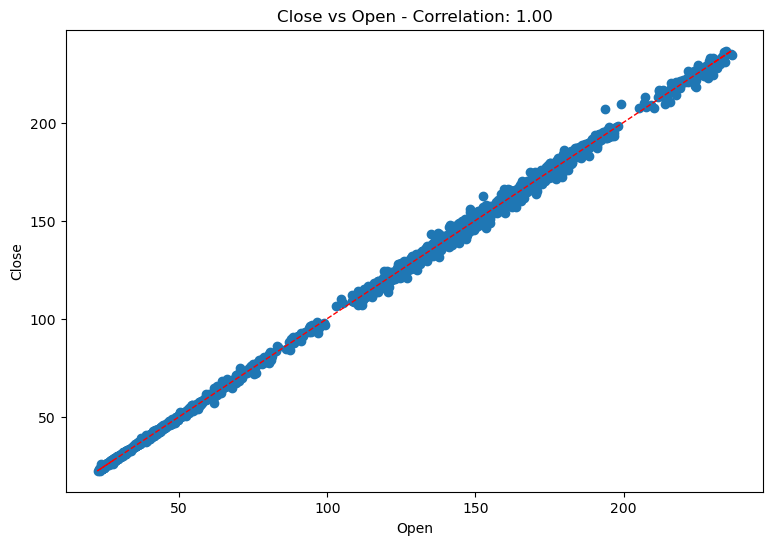

In [14]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature=df_Apple["Open"]
label=df_Apple["Close"]
correlation=feature.corr(label)
plt.scatter(x=feature,y=label)
plt.xlabel("Open")
plt.ylabel("Close")
ax.set_title(f"Close vs Open - Correlation: {correlation:.2f}")
# Fit a line (linear regression) to the data
z = np.polyfit(df_Apple["Open"], df_Apple["Close"], 1)
y_hat = np.polyval(z, df_Apple["Open"])
# Plot the fitted line (linear regression line)
plt.plot(df_Apple["Open"], y_hat, "r--", lw=1)
# Display the plot
plt.show()

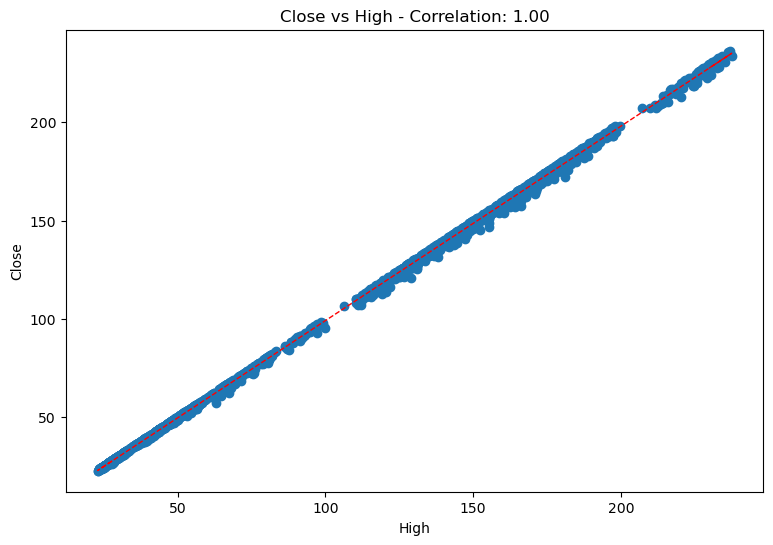

In [15]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature=df_Apple["High"]
label=df_Apple["Close"]
correlation=feature.corr(label)
plt.scatter(x=feature,y=label)
plt.xlabel("High")
plt.ylabel("Close")
ax.set_title(f"Close vs High - Correlation: {correlation:.2f}")
# Fit a line (linear regression) to the data
z = np.polyfit(df_Apple["High"], df_Apple["Close"], 1)
y_hat = np.polyval(z, df_Apple["High"])
# Plot the fitted line (linear regression line)
plt.plot(df_Apple["High"], y_hat, "r--", lw=1)
# Display the plot
plt.show()

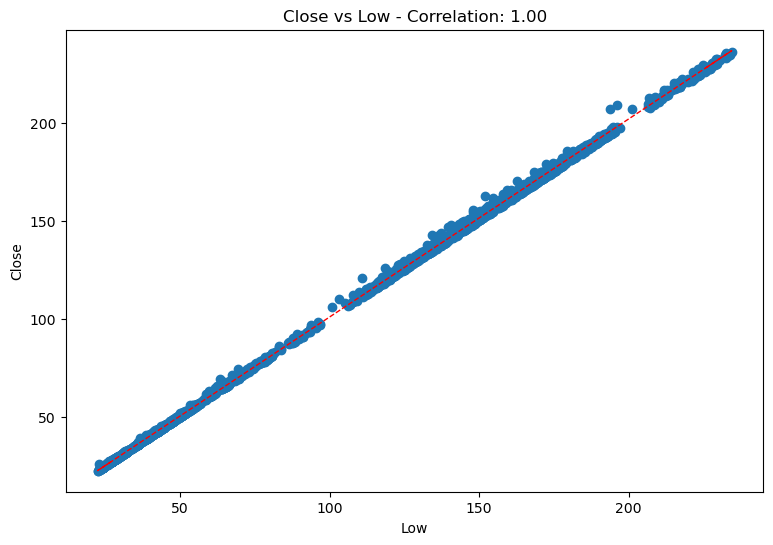

In [16]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature=df_Apple["Low"]
label=df_Apple["Close"]
correlation=feature.corr(label)
plt.scatter(x=feature,y=label)
plt.xlabel("Low")
plt.ylabel("Close")
ax.set_title(f"Close vs Low - Correlation: {correlation:.2f}")
# Fit a line (linear regression) to the data
z = np.polyfit(df_Apple["Low"], df_Apple["Close"], 1)
y_hat = np.polyval(z, df_Apple["Low"])
# Plot the fitted line (linear regression line)
plt.plot(df_Apple["Low"], y_hat, "r--", lw=1)
# Display the plot
plt.show()

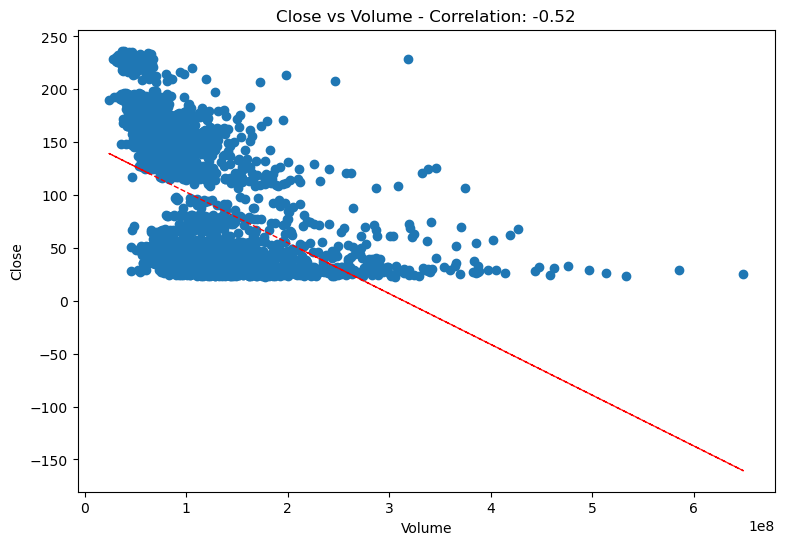

In [17]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature=df_Apple["Volume"]
label=df_Apple["Close"]
correlation=feature.corr(label)
plt.scatter(x=feature,y=label)
plt.xlabel("Volume")
plt.ylabel("Close")
ax.set_title(f"Close vs Volume - Correlation: {correlation:.2f}")
# Fit a line (linear regression) to the data
z = np.polyfit(df_Apple["Volume"], df_Apple["Close"], 1)
y_hat = np.polyval(z, df_Apple["Volume"])
# Plot the fitted line (linear regression line)
plt.plot(df_Apple["Volume"], y_hat, "r--", lw=1)
# Display the plot
plt.show()

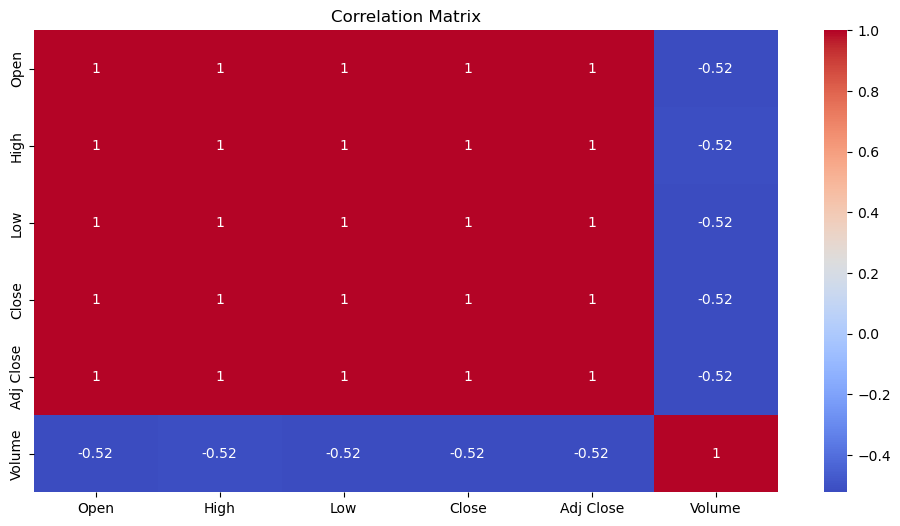

In [18]:
import seaborn as sns
# Correlation matrix
correlation_matrix = df_Apple.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

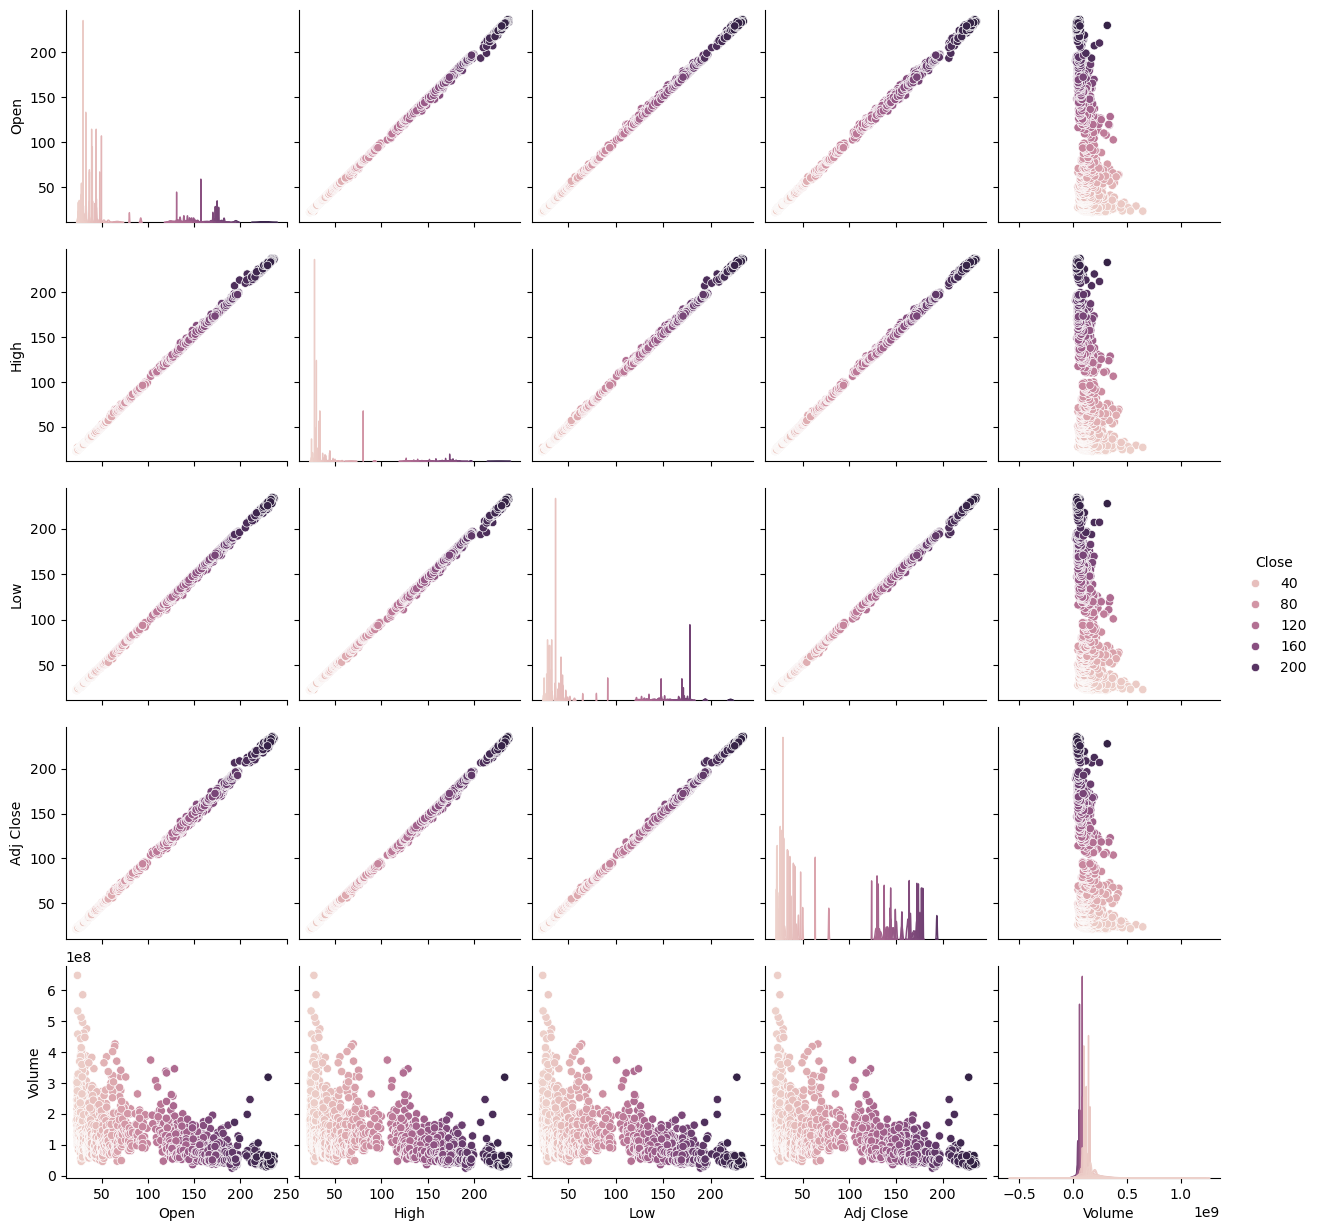

In [19]:
sns.pairplot(df_Apple,hue="Close")

## 3.Feature Engineering Using Financial Indicators & Data Preprocessing

### Moving Averages (SMA, EMA):

In [20]:
df_Apple['SMA_20'] = df_Apple['Close'].rolling(window=20).mean()
df_Apple['EMA_20'] = df_Apple['Close'].ewm(span=20, adjust=False).mean()

In [21]:
delta = df_Apple['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_Apple['RSI'] = 100 - (100 / (1 + rs))

In [22]:
df_Apple['Lag_1'] = df_Apple['Close'].shift(1)
df_Apple['Lag_2'] = df_Apple['Close'].shift(2)
df_Apple.dropna(inplace=True)

## 4.visualization

## Univariate Analysis

C:\Users\BAdmin\AppData\Local\Temp\ipykernel_11324\622555745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Apple["Close"],color="y")


<Axes: xlabel='Close', ylabel='Density'>

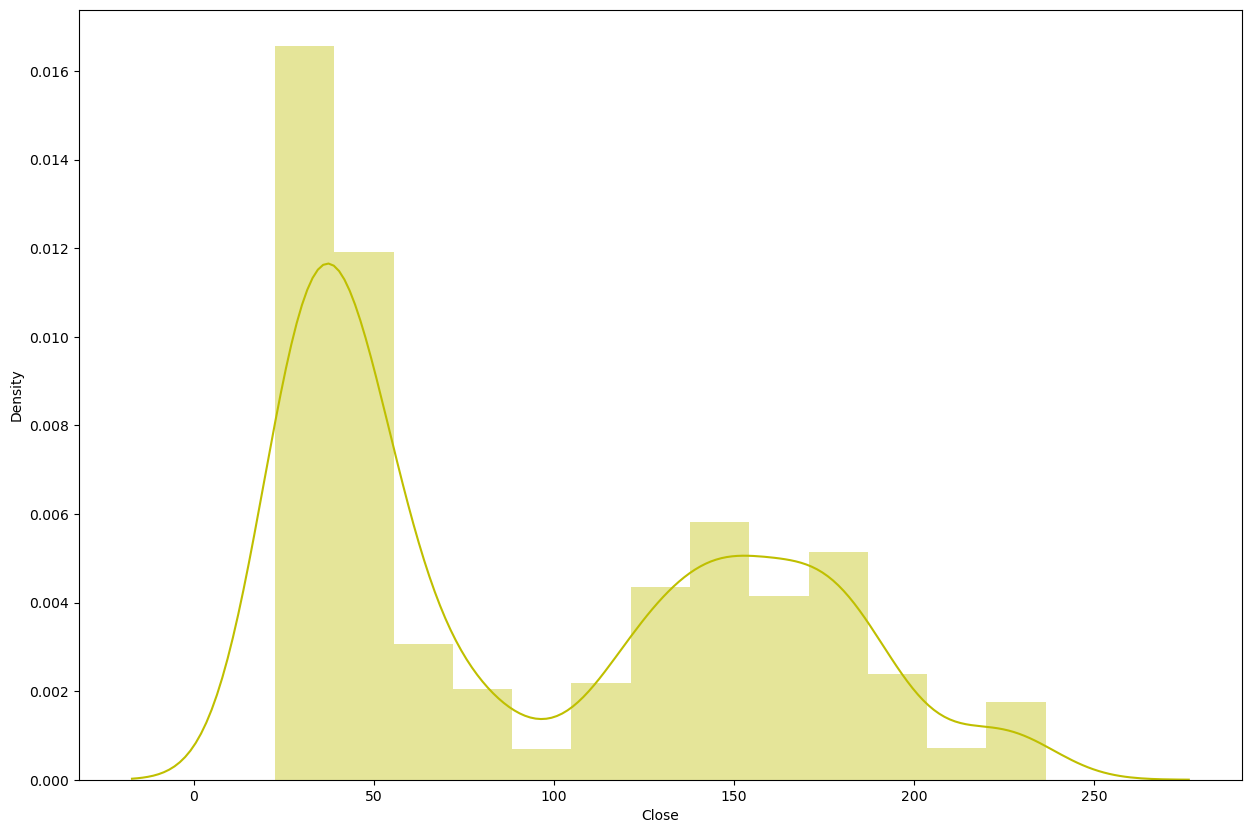

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(df_Apple["Close"],color="y")

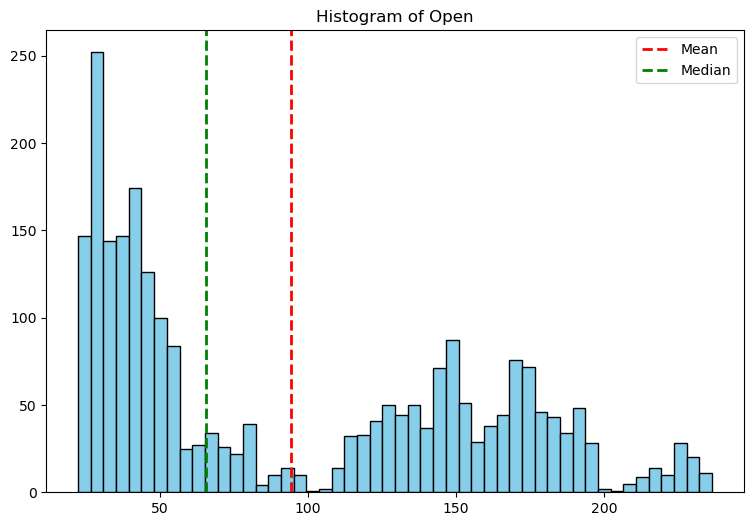

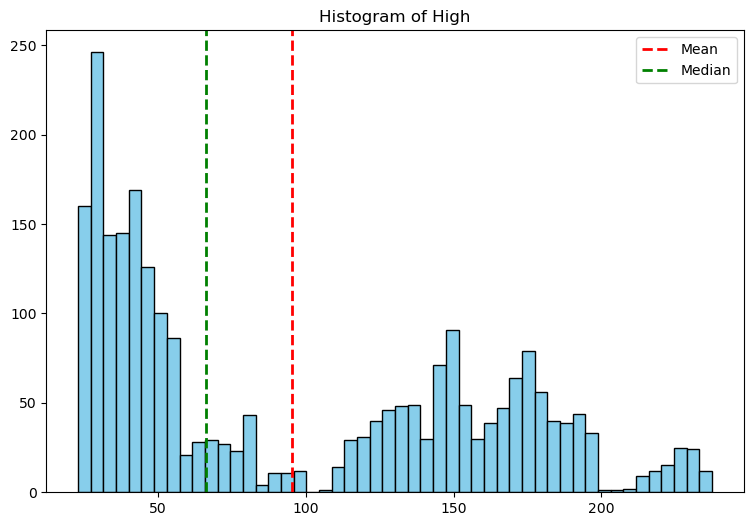

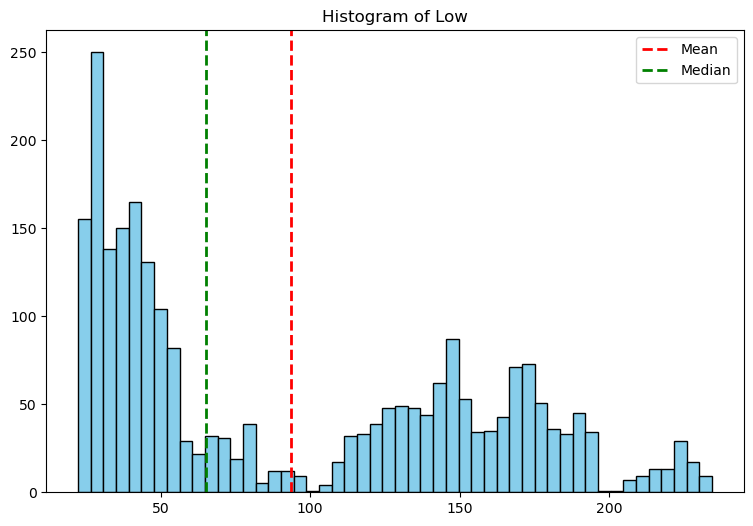

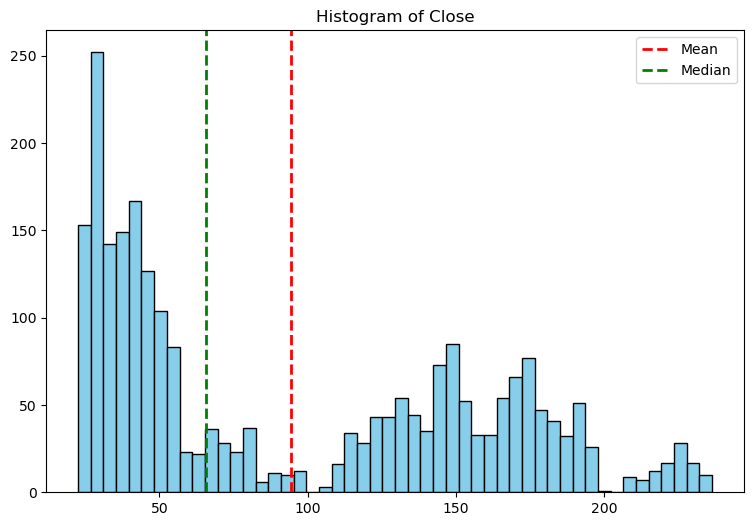

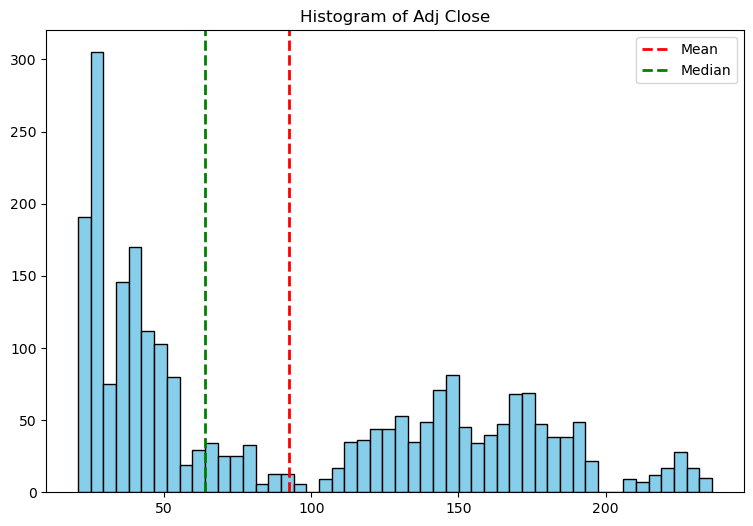

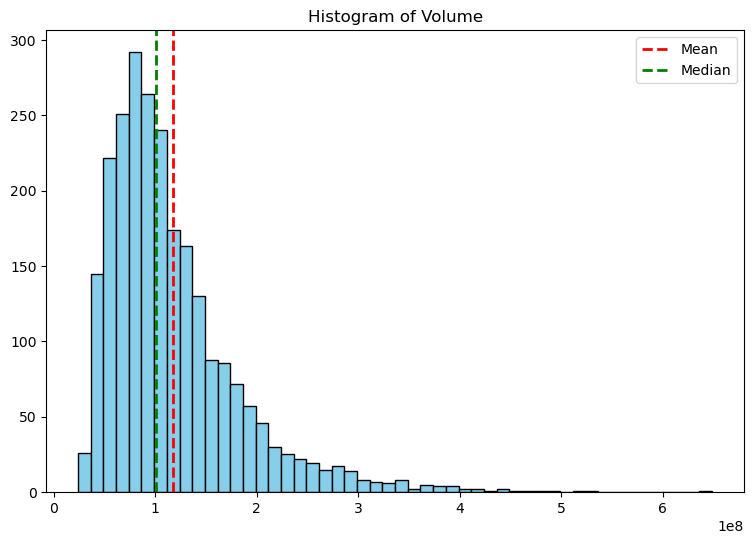

In [24]:
numeric_features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for col in numeric_features:
    fig, ax = plt.subplots(figsize=(9, 6))
    # Extract the feature column
    feature = df_Apple[col].dropna()  # Drop NaNs if any
    # Plot histogram
    ax.hist(feature, bins=50, color="skyblue", edgecolor="black")
    # Plot mean and median lines
    ax.axvline(feature.mean(), color="red", linestyle="dashed", linewidth=2, label="Mean")
    ax.axvline(feature.median(), color="green", linestyle="dashed", linewidth=2, label="Median")
    ax.set_title(f"Histogram of {col}")
    ax.legend()
    plt.show()

C:\Users\BAdmin\AppData\Local\Temp\ipykernel_11324\1830186221.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df_Apple["Close"]),color="y")


<Axes: xlabel='Close', ylabel='Density'>

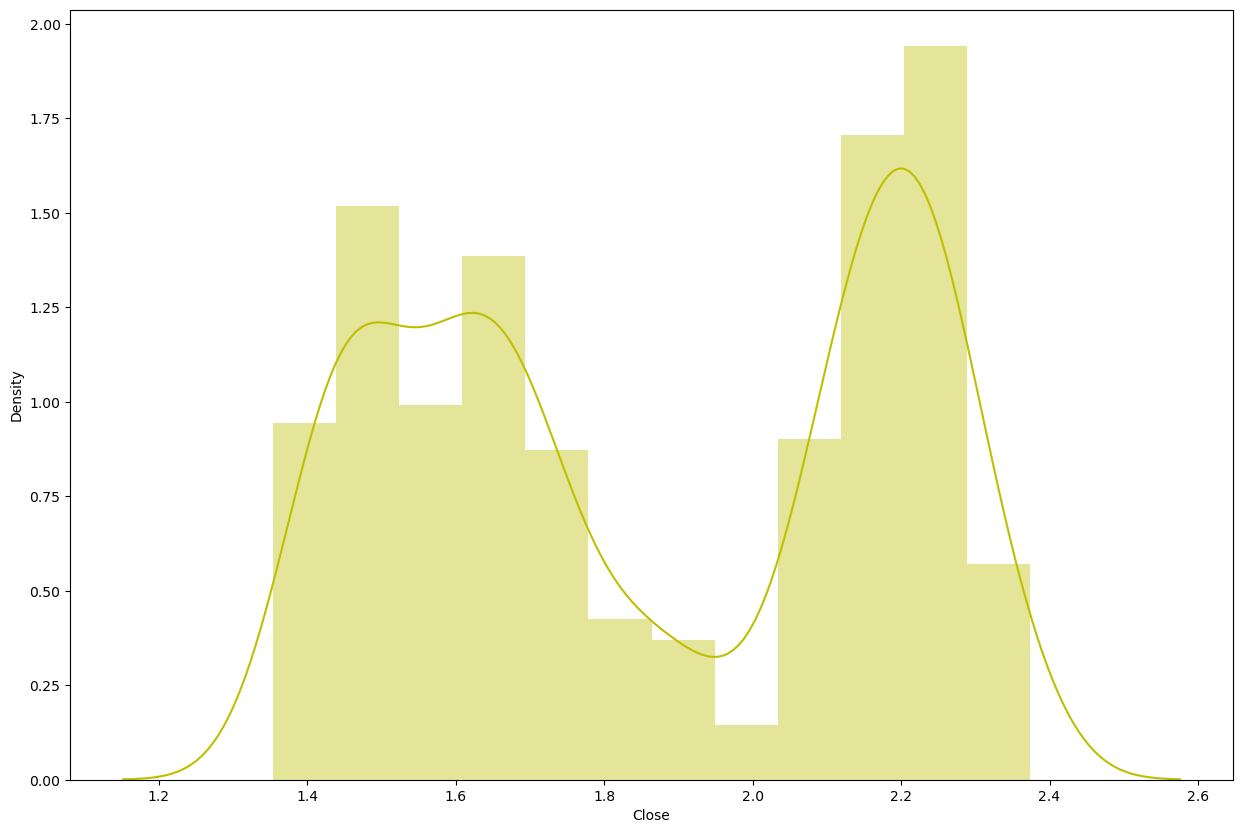

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df_Apple["Close"]),color="y")

In [26]:
df_Apple['SMA_20'] = df_Apple['Close'].rolling(window=20).mean()

In [27]:
df_Apple['EMA_20'] = df_Apple['Close'].ewm(span=20, adjust=False).mean()

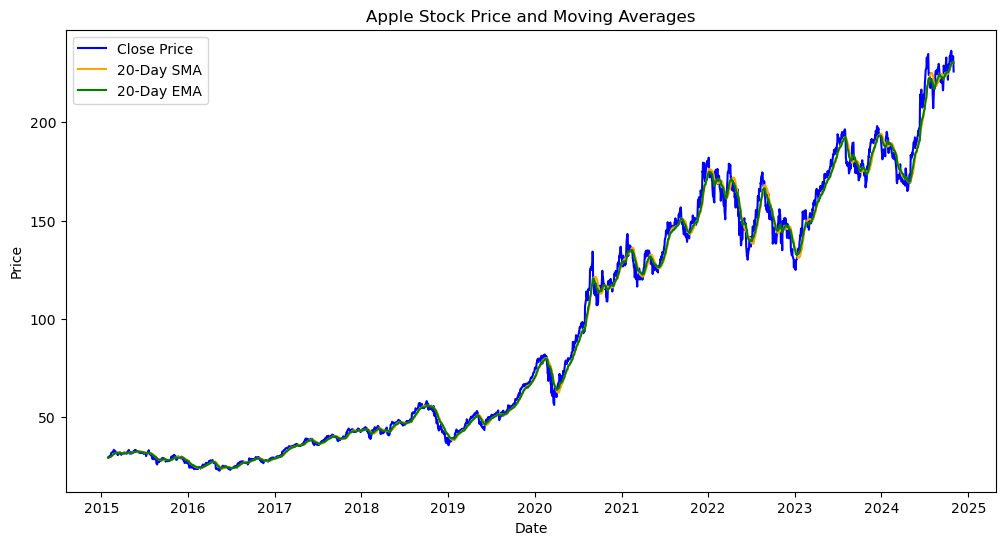

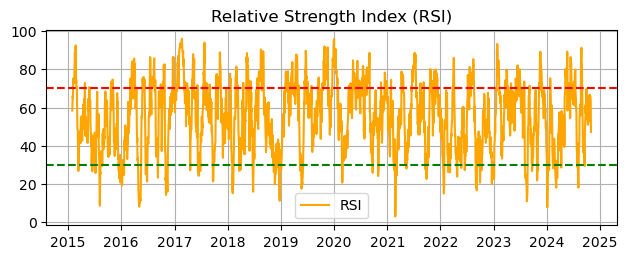

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df_Apple['Close'], label="Close Price", color='blue')
plt.plot(df_Apple['SMA_20'], label="20-Day SMA", color='orange')
plt.plot(df_Apple['EMA_20'], label="20-Day EMA", color='green')
plt.title("Apple Stock Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(df_Apple['RSI'], label="RSI", color='orange')
plt.axhline(70, color='red', linestyle='--')  # Overbought threshold
plt.axhline(30, color='green', linestyle='--')  # Oversold threshold
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
df_Apple['Daily_Return'] = df_Apple['Close'].pct_change()

In [30]:
returns = df_Apple['Daily_Return'].dropna()

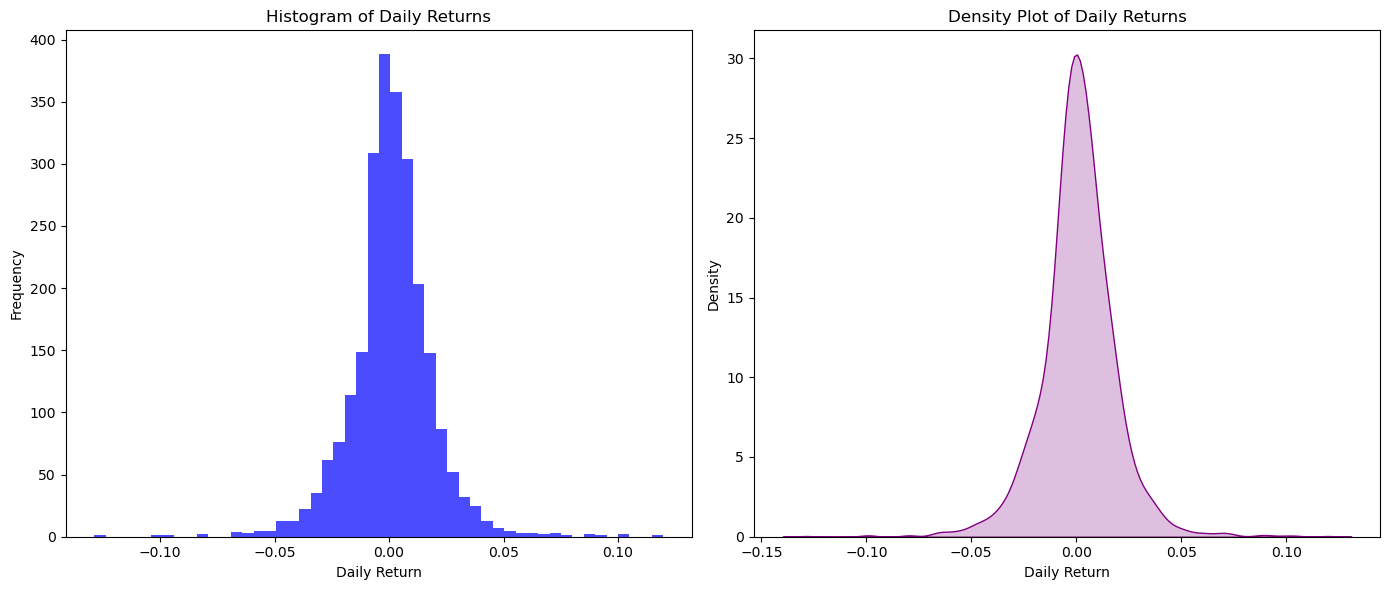

In [31]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(returns, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(returns, color='purple', fill=True)
plt.title('Density Plot of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

### Handling Outliers

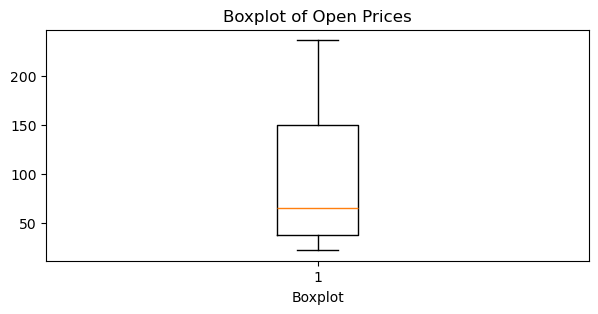

In [32]:
plt.figure(figsize=(7, 3))
plt.boxplot(df_Apple["Open"])
plt.xlabel("Boxplot")
plt.title("Boxplot of Open Prices")
plt.show()

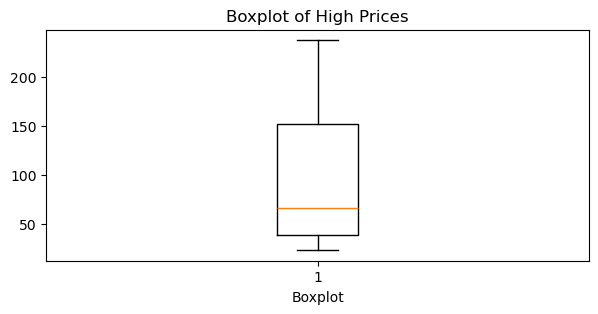

In [33]:
plt.figure(figsize=(7, 3))
plt.boxplot(df_Apple["High"])
plt.xlabel("Boxplot")
plt.title("Boxplot of High Prices")
plt.show()

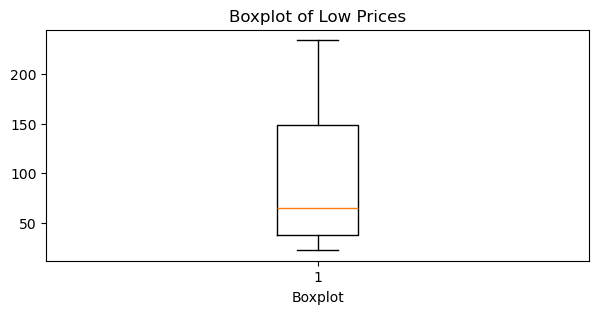

In [34]:
plt.figure(figsize=(7, 3))
plt.boxplot(df_Apple["Low"])
plt.xlabel("Boxplot")
plt.title("Boxplot of Low Prices")
plt.show()

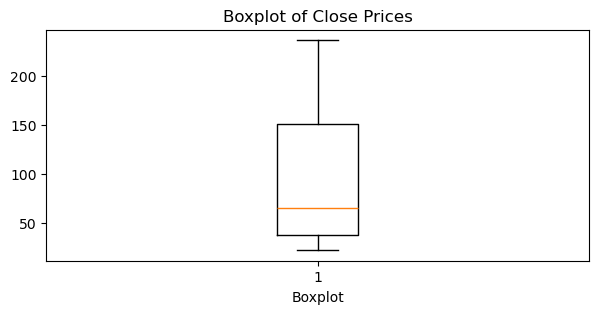

In [35]:
plt.figure(figsize=(7, 3))
plt.boxplot(df_Apple["Close"])
plt.xlabel("Boxplot")
plt.title("Boxplot of Close Prices")
plt.show()

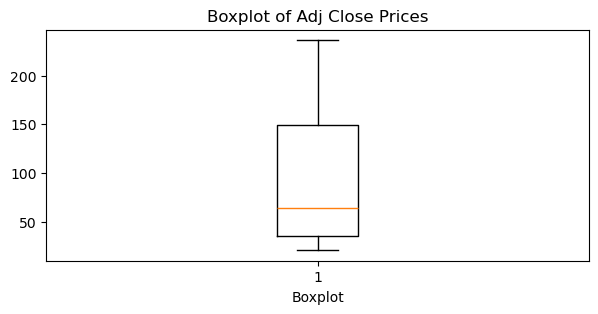

In [36]:
plt.figure(figsize=(7, 3))
plt.boxplot(df_Apple["Adj Close"])
plt.xlabel("Boxplot")
plt.title("Boxplot of Adj Close Prices")
plt.show()

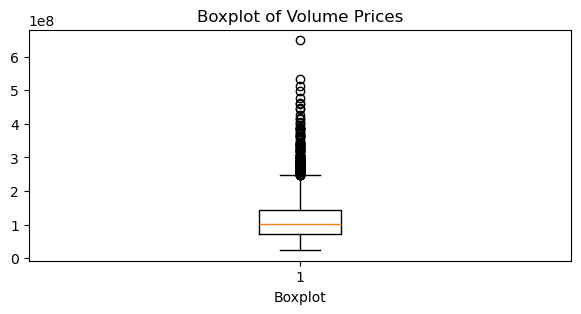

In [37]:
plt.figure(figsize=(7, 3))
plt.boxplot(df_Apple["Volume"])
plt.xlabel("Boxplot")
plt.title("Boxplot of Volume Prices")
plt.show()

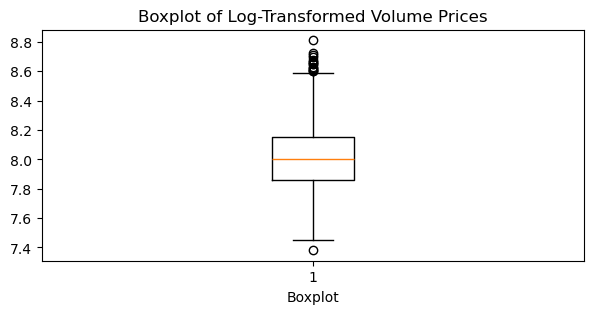

In [38]:
plt.figure(figsize=(7, 3))
plt.boxplot(np.log10(df_Apple["Volume"]))  # Log-transform for better scale
plt.xlabel("Boxplot")
plt.title("Boxplot of Log-Transformed Volume Prices")
plt.show()

## 5. Model Building and Prediction and  Model Evaluation

In [39]:
pip install scikit-learn xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 4.2 MB/s eta 0:00:30
   -- ------------------------------------- 6.3/124.9 MB 22.8 MB/s eta 0:00:06
   ---- ----------------------------------- 13.1/124.9 MB 28.4 MB/s eta 0:00:04
   ----- ---------------------------------- 17.6/124.9 MB 25.2 MB/s eta 0:00:05
   ------- -------------------------------- 24.1/124.9 MB 27.3 MB/s eta 0:00:04
   --------- ------------------------------ 29.6/124.9 MB 27.2 MB/s eta 0:00:04
   ------------- -------------------------- 42.2/124.9 MB 32.0 MB/s eta 0:00:03
   ------------------- -------------------- 60.6/124.9 MB 39.8 MB/s eta 0:00:02
   ------------------------- -------------- 78.4/124.9 MB 45.1 MB/s eta 0:00:02
   ------------------------------ --------- 94.9/124.9 MB 48.5 MB/s eta 0:00:01
   ----------------------------------- --- 113.0/124.9 MB 52.3 MB/s eta 0:00:01
   --------------------------------------  124.8/124

In [40]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,BaggingRegressor,GradientBoostingRegressor, StackingRegressor,RandomForestRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
# Step 1: Create lag features
df_Apple['Lag_1'] = df_Apple['Close'].shift(1)
df_Apple['Lag_2'] = df_Apple['Close'].shift(2)

# Step 2: Remove rows with NaN values due to lagging
df_Apple = df_Apple.dropna()

# Step 3: Define features (X) and target (y)
features = ['Lag_1', 'Lag_2', 'SMA_20', 'EMA_20', 'RSI', 'Volume']
X = df_Apple[features]
y = df_Apple['Close']

# Step 4: Split the data into training and testing sets (time-based split)
train_size = int(0.8 * len(df_Apple))  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [42]:
#  Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
#  Make Predictions
y_pred_train_lr = model.predict(X_train)
y_pred_test_lr = model.predict(X_test)
y_pred_test_lr

array([148.17390636, 150.56841825, 151.01862432, 148.37359938,
       145.05413957, 143.33370057, 148.35637816, 148.14331236,
       147.66052374, 146.2015435 , 143.00793271, 141.30696274,
       142.55103804, 142.46398119, 144.27969185, 144.78893052,
       142.59067062, 137.19054571, 135.51940285, 132.95253527,
       133.16868156, 135.39936599, 132.61508595, 132.23566283,
       130.37568688, 127.29083251, 130.17596474, 129.7841636 ,
       125.79302853, 126.76431146, 126.26197285, 130.08565061,
       130.59090145, 131.37313533, 133.48615925, 133.83999765,
       135.15174359, 136.22767895, 136.08019822, 136.22807828,
       138.67150637, 142.10819933, 143.18255194, 143.06554041,
       144.9000401 , 145.98994612, 143.75908983, 144.87666485,
       146.18284893, 150.78434137, 153.38344823, 151.50738441,
       153.75366913, 151.42647326, 150.60495166, 150.9498318 ,
       153.30332177, 152.85875214, 154.39984316, 153.23289288,
       151.87971902, 148.58292712, 148.64764634, 148.41

####  Metrics for Linear Regression


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
mae = mean_absolute_error(y_test, y_pred_test_lr)
mse = mean_squared_error(y_test,y_pred_test_lr)
r2 = r2_score(y_test, y_pred_test_lr)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 1.7742003688688235
MSE: 5.856525690397153
R^2: 0.9913665174324017


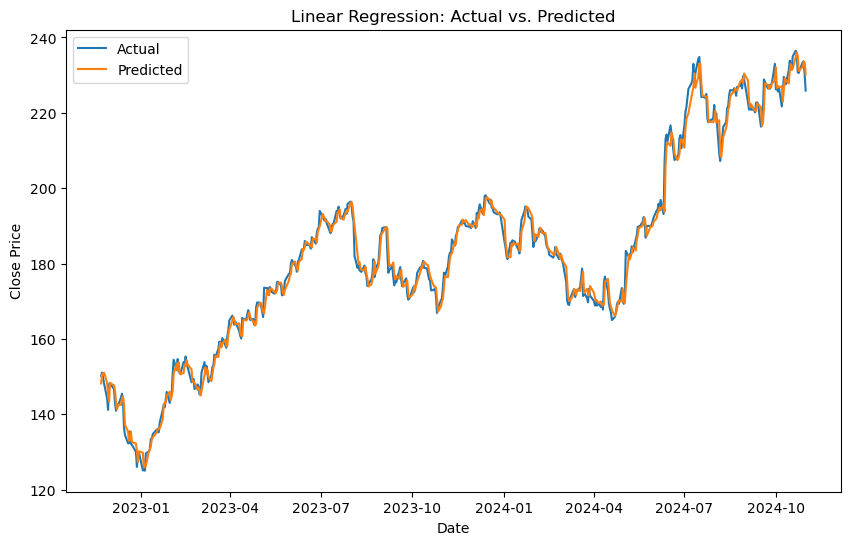

In [46]:
# Step 8: Visualize the Results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_Apple.index[train_size:], y_test, label='Actual')
plt.plot(df_Apple.index[train_size:], y_pred_test_lr, label='Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## RandomForest

In [47]:
#Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
#Make Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
y_pred_test_rf

array([147.08549942, 149.64440247, 150.53360123, 148.59330109,
       145.63630112, 143.29169952, 147.50620026, 148.45610046,
       148.55500107, 146.71649887, 143.77139847, 141.96929749,
       141.77169937, 142.27569809, 145.38950089, 147.00970062,
       142.17960007, 138.11659981, 135.85459824, 133.12359779,
       132.29819748, 134.10580139, 133.90369804, 133.10909836,
       129.24130089, 126.26789963, 129.50790138, 128.06749977,
       124.509599  , 125.53579964, 125.28487473, 129.9569014 ,
       129.43090065, 130.16890099, 133.55769928, 134.17880112,
       135.15730133, 136.07280167, 136.08920181, 135.67560181,
       141.27340149, 142.63330231, 143.76850266, 143.2169014 ,
       144.5040007 , 145.94909836, 144.22409958, 145.2040004 ,
       146.14439911, 149.31509949, 154.54199997, 152.62369873,
       154.55429947, 152.41060013, 150.50749893, 150.63089996,
       153.75080032, 153.01820053, 153.60719894, 153.7157016 ,
       152.50989914, 149.24389999, 148.85949875, 147.91

####  Metrics for RandomForest

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
mae = mean_absolute_error(y_test, y_pred_test_rf)
mse = mean_squared_error(y_test,y_pred_test_rf)
r2 = r2_score(y_test, y_pred_test_rf)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 13.739593935325498
MSE: 486.3763286178306
R^2: 0.2830012576740253


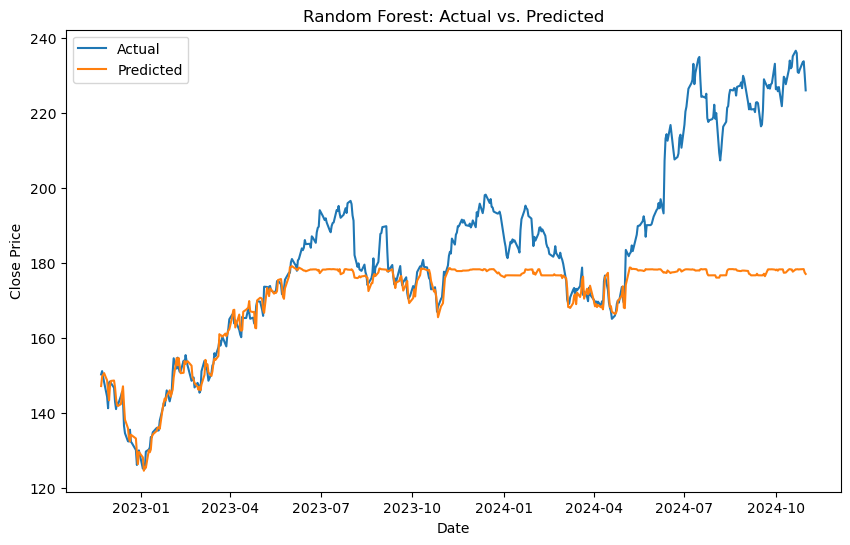

In [51]:
#  Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(df_Apple.index[train_size:], y_test, label='Actual')
plt.plot(df_Apple.index[train_size:], y_pred_test_rf, label='Predicted')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 6.Hyperparameter Tuning

In [52]:
#  Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [53]:
# Step 2: Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
# Step 3: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',  # Metric for evaluation
    cv=5,  # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [56]:
# Step 4: Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\BAdmin\anaconda3\envs\bfarpy\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
# Step 5: Get the best parameters and evaluate
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [58]:
# Step 6: Evaluate the Best Model
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 13.896035813160879
MSE: 491.7449879028301
R^2: 0.2750869704671207


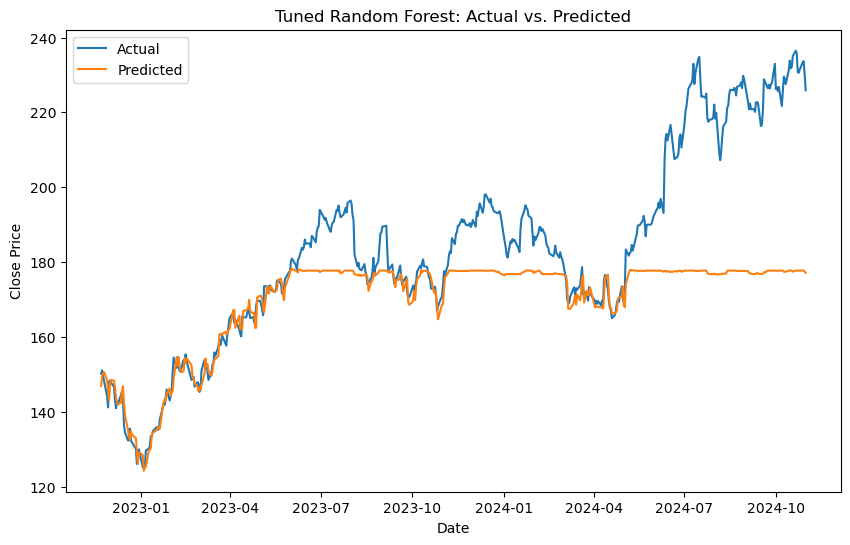

In [59]:
# Step 7: Visualize Results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_Apple.index[train_size:], y_test, label='Actual')
plt.plot(df_Apple.index[train_size:], y_pred_test, label='Predicted')
plt.title('Tuned Random Forest: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Comparison of two model

In [60]:
# Evaluation metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_lr = r2_score(y_test,y_pred_test_lr)

# Evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test,y_pred_test)
r2_rf = r2_score(y_test, y_pred_test)

print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")

Linear Regression - MSE: 5.856525690397153, R-squared: 0.9913665174324017
Random Forest - MSE: 491.7449879028301, R-squared: 0.2750869704671207


### Conclusion

Linear Regression is the better model in this case, as it outperforms Random Forest on both MSE and R². This result suggests that the relationship in the data may be mostly linear, which Linear Regression can capture effectively. Random Forest, being more flexible and suited for non-linear relationships, might not add much value if the data does not have significant non-linear patterns.

C:\Users\BAdmin\anaconda3\envs\bfarpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\BAdmin\anaconda3\envs\bfarpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\BAdmin\anaconda3\envs\bfarpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\BAdmin\anaconda3\envs\bfarpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\BAdmin\anaconda3\envs\bfarpy\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\BAdmin\anaconda3

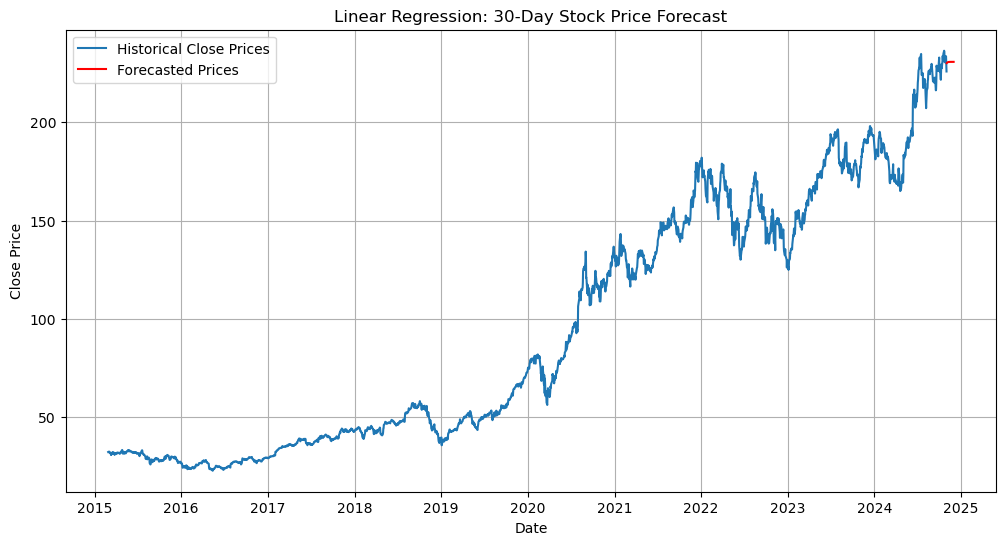

         Date  Forecasted_Close
0  2024-11-01        230.175700
1  2024-11-02        230.324899
2  2024-11-03        230.441226
3  2024-11-04        230.529670
4  2024-11-05        230.596842
5  2024-11-06        230.647855
6  2024-11-07        230.686597
7  2024-11-08        230.716020
8  2024-11-09        230.738365
9  2024-11-10        230.755334
10 2024-11-11        230.768222
11 2024-11-12        230.778009
12 2024-11-13        230.785443
13 2024-11-14        230.791088
14 2024-11-15        230.795375
15 2024-11-16        230.798631
16 2024-11-17        230.801103
17 2024-11-18        230.802981
18 2024-11-19        230.804407
19 2024-11-20        230.805490
20 2024-11-21        230.806313
21 2024-11-22        230.806937
22 2024-11-23        230.807412
23 2024-11-24        230.807772
24 2024-11-25        230.808046
25 2024-11-26        230.808253
26 2024-11-27        230.808411
27 2024-11-28        230.808531
28 2024-11-29        230.808622
29 2024-11-30        230.808691


In [61]:
#: Forecast the next 30 days iteratively
forecast_days = 30
last_row = X.iloc[-1].copy()  # Use the last known data as the starting point
predictions = []

for _ in range(forecast_days):
    # Predict the next day
    next_pred = model.predict(last_row.values.reshape(1, -1))[0]
    predictions.append(next_pred)

    # Update lag features for the next prediction
    last_row['Lag_2'] = last_row['Lag_1']
    last_row['Lag_1'] = next_pred

#  Create a DataFrame for the forecast
future_dates = pd.date_range(start=df_Apple.index[-1] + pd.Timedelta(days=1), periods=forecast_days)
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Close': predictions})

#  Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_Apple.index, df_Apple['Close'], label='Historical Close Prices')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Close'], label='Forecasted Prices', color='red')
plt.title('Linear Regression: 30-Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

#  Display forecast
print(forecast_df)

***